In [2]:
import pandas as pd
df = pd.read_csv("filename.csv")
print(df.shape)
df.head()

(10011, 36)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1588703228027637762,1588657407215169537,2022-11-05 01:22:20 UTC,2022-11-05,01:22:20,0,1465312236650520576,fabhcoir,AOIBHEIL the WOKE GRANNY 🐀says NO DM's,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nosuperhero', 'name': 'No Su...",NaN,NaN,NaN,NaN
1,1588703223648747521,1588702582540996608,2022-11-05 01:22:19 UTC,2022-11-05,01:22:19,0,2443158750,easye_coli,EasyE Coli,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TrentTelenko', 'name': 'Tren...",NaN,NaN,NaN,NaN
2,1588703216065482752,1588662194207850496,2022-11-05 01:22:18 UTC,2022-11-05,01:22:18,0,1404527258279219201,__wrigley,Wrigley,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KingJon33', 'name': 'jon', '...",NaN,NaN,NaN,NaN
3,1588703200181645312,1588703200181645312,2022-11-05 01:22:14 UTC,2022-11-05,01:22:14,0,168863219,nickmmaier,Nick Maier,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1588703199577661440,1588660207336722432,2022-11-05 01:22:14 UTC,2022-11-05,01:22:14,0,1554860205049085957,alfred_wickham,Alfred Wickham,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kevin_of_Irl', 'name': 'kevi...",NaN,NaN,NaN,NaN


# ANALYSIS 1


a quick peek at all column names in the dataset

In [4]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

lets use username, tweet and language

In [5]:
df1 = df[["username", "tweet", "language"]]
df1.head()

,username,tweet,language
0,fabhcoir,@nosuperhero @SassyLynn14 @ReallyActivist @elo...,en
1,easye_coli,"@TrentTelenko Is Russia using any ""armored"" tr...",en
2,__wrigley,@KingJon33 @sonny0411 @KyivIndependent Because...,en
3,nickmmaier,The sky is falling! Why don’t you curl up in ...,en
4,alfred_wickham,@kevin_of_Irl @Maks_NAFO_FELLA China is the re...,en


In [6]:
# check for null values
df1.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

no null values

In [7]:
# look at how many tweets are posted in which language
df1.language.value_counts()

en     8846
pt      395
it      154
qme     143
in      105
und      47
es       41
ja       33
ru       33
de       26
fr       25
fi       21
ca       21
qht      20
vi       16
th       13
pl       10
nl       10
ro        8
hi        7
tl        6
uk        4
zh        4
et        4
qam       3
ar        3
sv        2
tr        2
no        2
cs        2
ta        1
ur        1
zxx       1
ko        1
ht        1
Name: language, dtype: int64

we may plot the above in a histogram to view the distribution graphically


In [9]:
len(df1.language.value_counts())

35

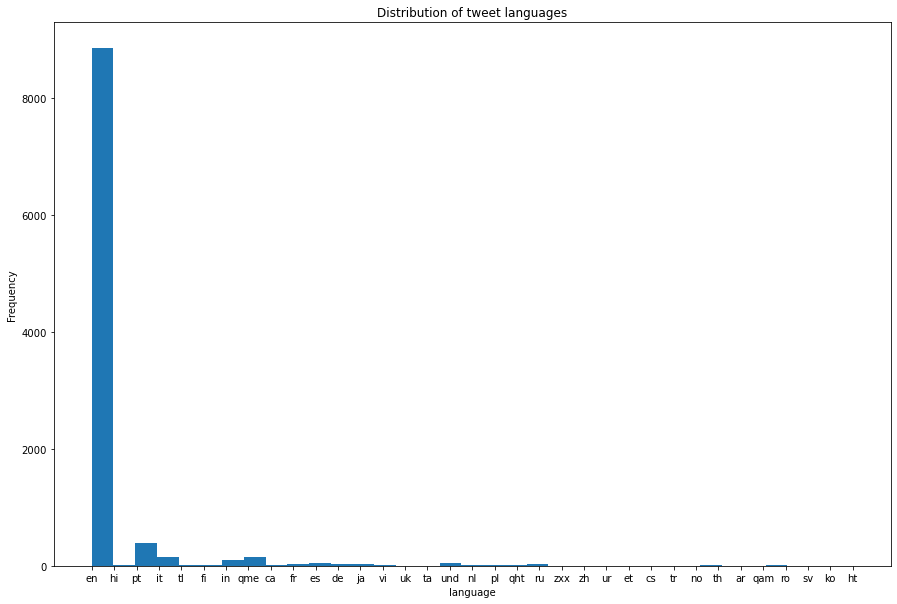

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15, 10))
plt.xlabel("language")
plt.ylabel("Frequency")
plt.title("Distribution of tweet languages")
plt.hist(df1.language,35)
plt.show()

most tweets are in english, hence prep it by removing all links, punctuation,symbols and other language errors

In [27]:
import nltk
from nltk.corpus import stopwords

In [32]:
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
import re
import string

In [36]:
# function to clean our text
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text




In [39]:
df1["tweet"] = df1["tweet"].apply(clean)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12560\3522177448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["tweet"] = df1["tweet"].apply(clean)


In [40]:
df1.head()

,username,tweet,language
0,fabhcoir,nosuperhero reallyactivist elonmusk agre musk...,en
1,easye_coli,trenttelenko russia use armor train high visib...,en
2,__wrigley,kyivindepend war must end mankind slav must ...,en
3,nickmmaier,sky fall don't curl fetal posit suck thumb bi...,en
4,alfred_wickham,kevinofirl maksnafofella china real big bad mo...,en


wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<function matplotlib.pyplot.show(close=None, block=None)>

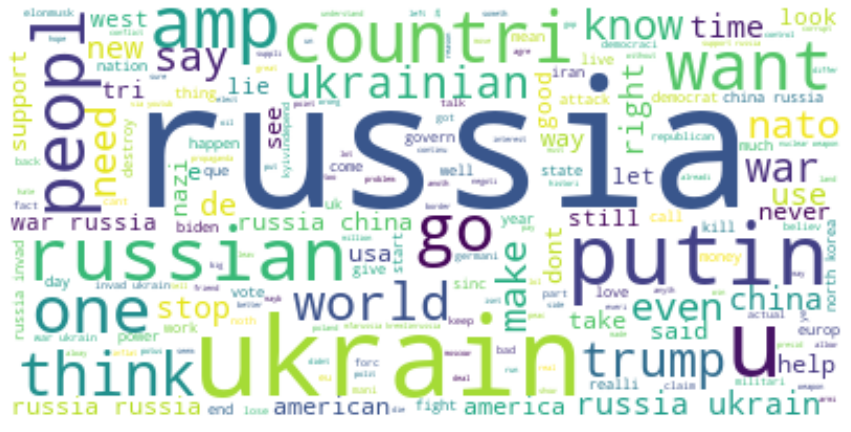

In [46]:
text = " ".join(i for i in df1.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= "white").generate(text)
plt.figure(figsize= (15,10))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show

add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets

In [47]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


True

In [49]:
sentiments = SentimentIntensityAnalyzer()
df1["positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1.tweet]
df1["negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1.tweet]
df1["neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df1.tweet]

df2 = df1[["tweet", "positive", "negative", "neutral"]]
df2.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12560\2152799405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1.tweet]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12560\2152799405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1.tweet]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12560\2152799405.py:4: SettingWithCopyWarning: 
A value is trying 

,tweet,positive,negative,neutral
0,nosuperhero reallyactivist elonmusk agre musk...,0.221,0.103,0.676
1,trenttelenko russia use armor train high visib...,0.000,0.000,1.000
2,kyivindepend war must end mankind slav must ...,0.062,0.341,0.597
3,sky fall don't curl fetal posit suck thumb bi...,0.000,0.132,0.868
4,kevinofirl maksnafofella china real big bad mo...,0.000,0.304,0.696


let’s have a look at the most frequent words used by people with positive sentiments:

<function matplotlib.pyplot.show(close=None, block=None)>

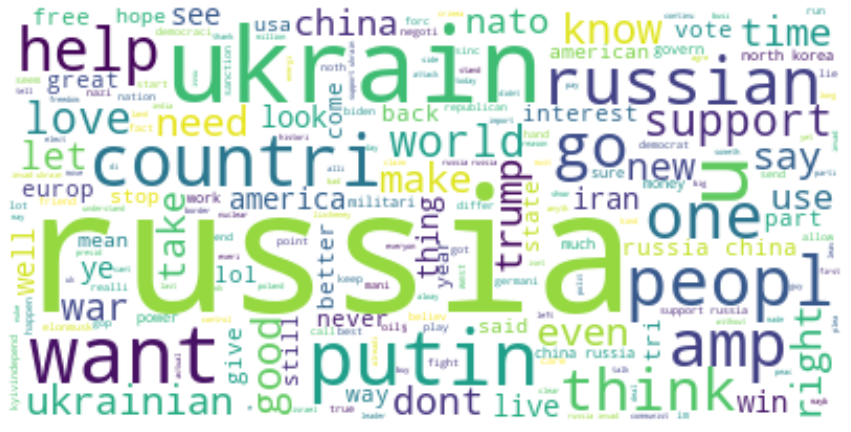

In [50]:
text = " ".join([i for i in df2.tweet[df2.positive > df2.negative]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= "white").generate(text)
plt.figure(figsize= (15,10))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show

Now let’s have a look at the most frequent words used by people with negative sentiments

<function matplotlib.pyplot.show(close=None, block=None)>

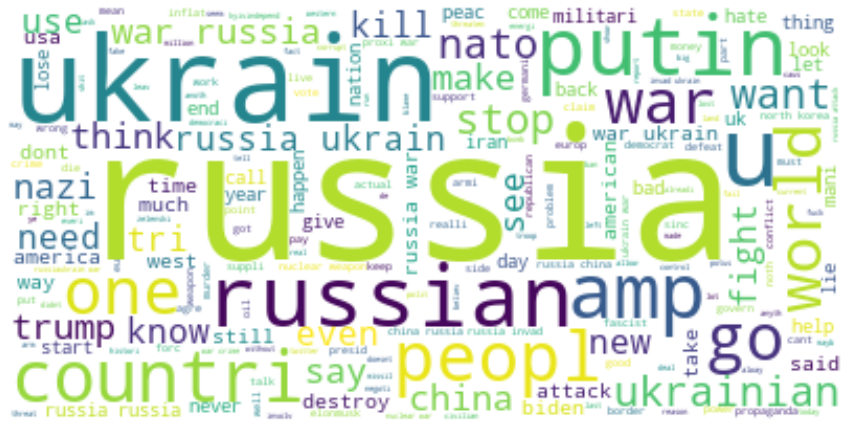

In [52]:
text = " ".join([i for i in df2.tweet[df2.negative > df2.positive]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= "white").generate(text)
plt.figure(figsize= (15,10))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show

in this section, the following was accomplished:
1. Graphically display distribution of tweet languages in a histogram
2. Show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war
3. have a look at the most frequent words used by people with positive sentiments
4. have a look at the most frequent words used by people with negative sentiments